Implement suitable filters (or use methods from Python Sk-learn or similar tool-kits) for
a classification task of your own choice! Report performance measures (you can consider
a benchmark dataset like 20 Newsgroups) of your classifiers in respect to the filtered
features, e.g. on a regular grid (50, 100, 150, 200, 250, ...) of feature set sizes. Provide
plots where ever possible to explain your answer.

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [2]:
training_data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
test_data = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

Feature Selection Techniques(Filter, Wrapper, Embedded Methods)
For categorical features:(nominal - no ordering)
    -Chi square test(the stronger a feature is associated to a class outcome the higher is the value of χ²)
    -Mutual Information(the stronger a feature is associated to a class outcome the higher is the value of I)
For Numerical features:
    -T test
    -ANOVA

In [4]:
print(type(training_data))

<class 'sklearn.utils.Bunch'>


In [8]:
len(training_data['data'])

11314

In [9]:
training_data['data'][0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [10]:
import pandas as pd
data = pd.DataFrame(training_data['data'], columns=['text'])
data

,text
0,I was wondering if anyone out there could enli...
1,A fair number of brave souls who upgraded thei...
2,"well folks, my mac plus finally gave up the gh..."
3,\nDo you have Weitek's address/phone number? ...
4,"From article <C5owCB.n3p@world.std.com>, by to..."
...,...
11309,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...
11310,"I have a (very old) Mac 512k and a Mac Plus, b..."
11311,I just installed a DX2-66 CPU in a clone mothe...
11312,\nWouldn't this require a hyper-sphere. In 3-...


In [20]:
data.to_string(columns=["text"], header=False, index=False, index_names=False)

In [21]:
data

,text
0,I was wondering if anyone out there could enli...
1,A fair number of brave souls who upgraded thei...
2,"well folks, my mac plus finally gave up the gh..."
3,\nDo you have Weitek's address/phone number? ...
4,"From article <C5owCB.n3p@world.std.com>, by to..."
...,...
11309,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...
11310,"I have a (very old) Mac 512k and a Mac Plus, b..."
11311,I just installed a DX2-66 CPU in a clone mothe...
11312,\nWouldn't this require a hyper-sphere. In 3-...


In [22]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [27]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
clean_trigrams = []
for eachdoc in range(len(data)):
    tokens = word_tokenize(data.iat[eachdoc, 0])
    trigrams = list(nltk.trigrams(tokens))
    process_trigrams = [[gram for gram in trigrams if not any(stop in gram for stop in stop_words)]]
    clean_trigrams += process_trigrams 

In [28]:
print(type(clean_trigrams))

<class 'list'>


In [29]:
import pickle
with open('clean_trigrams_news.pickle', 'wb') as f:
    pickle.dump(clean_trigrams, f)

In [30]:
def compare(doc, target_doc):
    count=0
    for gram in doc:
        if gram in target_doc:
            count += 1 
    return count

In [37]:
#compare each doc with every other doc
constraints = []
for i in range(len(clean_trigrams)):
    for j in range(i + 1, len(clean_trigrams)):
        t = compare(clean_trigrams[i], clean_trigrams[j])
        if t >= 3:  # t should pass as argument for testing diff values
            constraints.extend([[i,j]])
            break

In [38]:
import pickle
with open('constraints_news.pkl', 'wb') as f:
    pickle.dump(constraints, f)

In [39]:
print(constraints[:100])

[[0, 750], [4, 3471], [6, 5784], [7, 1194], [8, 3130], [9, 913], [10, 17], [11, 13], [13, 153], [14, 1292], [16, 17], [17, 25], [18, 5416], [21, 2266], [22, 1463], [24, 2378], [25, 49], [26, 2759], [28, 3410], [31, 1292], [33, 6543], [36, 848], [37, 44], [39, 121], [40, 1191], [43, 366], [44, 70], [45, 355], [47, 94], [48, 2704], [49, 59], [50, 555], [52, 10772], [54, 70], [55, 9623], [56, 6399], [57, 5220], [58, 675], [59, 82], [60, 2529], [61, 425], [64, 67], [65, 9623], [66, 740], [68, 878], [69, 498], [70, 91], [71, 4051], [72, 948], [74, 1129], [76, 2392], [77, 3080], [79, 2004], [80, 243], [82, 101], [83, 4682], [86, 262], [87, 6604], [91, 5487], [92, 8092], [93, 682], [94, 2451], [96, 571], [99, 5306], [100, 145], [101, 102], [102, 105], [104, 1253], [105, 109], [109, 138], [111, 1302], [112, 3451], [114, 2784], [117, 8136], [118, 3547], [119, 6532], [120, 1191], [121, 656], [123, 3010], [124, 2847], [127, 384], [129, 3141], [130, 11301], [133, 378], [137, 1638], [138, 141], [14

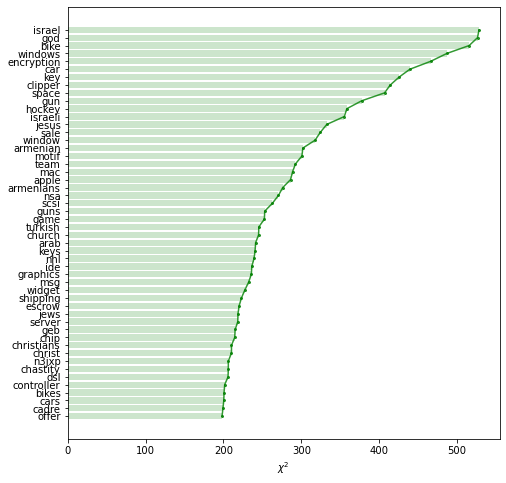

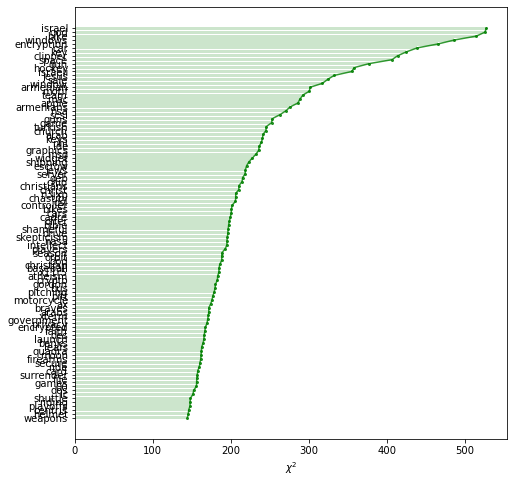

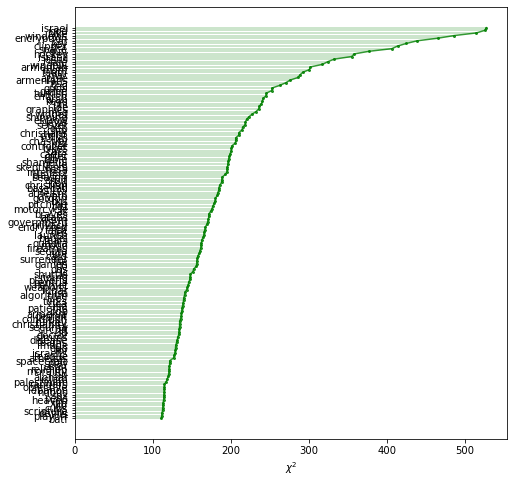

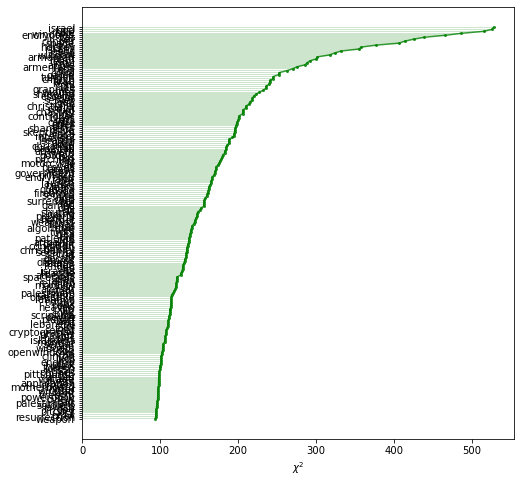

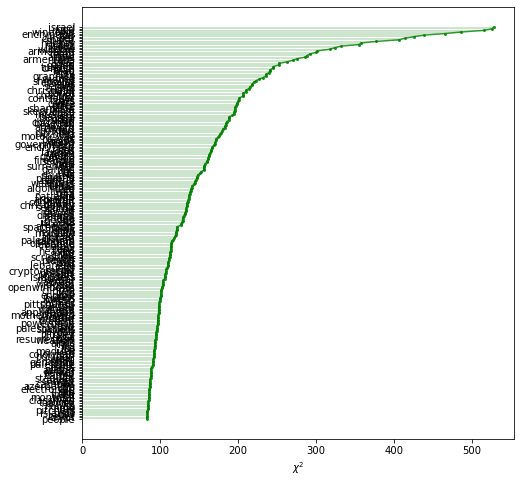

In [80]:
max_features_size = [50, 100, 150, 200, 250]
f1_scores = []
accuracies = []
for k in max_features_size:
    vectorizer  = TfidfVectorizer(analyzer='word', stop_words='english', use_idf=True)
    vectors_train = vectorizer.fit_transform(training_data.data)
    vectors_test = vectorizer.transform(test_data.data)
    # compute chi2 for each feature as part of feature selection technique
    chi2score = chi2(vectors_train, training_data.target)[0]
    fig = plt.figure(figsize=(6,6))
    axes = fig.add_axes([0, 0, 1, 1])
    wscores = zip(vectorizer.get_feature_names(), chi2score)
    wchi2 = sorted(wscores, key=lambda x:x[1])
    topchi2 = list(zip(*wchi2[-k:]))
    x = range(len(topchi2[1]))
    labels = topchi2[0]
    axes.barh(x, topchi2[1], align='center', alpha=.2, color='g')
    axes.plot(topchi2[1], x, '-o', markersize=2, alpha=.8, color='g')
    plt.yticks(x, labels)
    plt.xlabel('$\chi^2$')

In [81]:
f1_scores = []
accuracies = []
vectorizer  = TfidfVectorizer(analyzer='word', stop_words='english', use_idf=True)
vectors_train = vectorizer.fit_transform(training_data.data)
vectors_test = vectorizer.transform(test_data.data)
clf = MultinomialNB(alpha=0.01)
clf.fit(vectors_train, training_data.target)
preds = clf.predict(vectors_test)
f1_score = metrics.f1_score(test_data.target, preds, average='macro')
accuracy = metrics.accuracy_score(test_data.target, preds)
accuracies.append(accuracy)
f1_scores.append(f1_score)
print("Features size = {} , F1-score = {}".format(len(vectorizer.get_feature_names()), f1_score))
print("Features size = {} , Accuracy = {}".format(len(vectorizer.get_feature_names()), accuracy))

Features size = 101322 , F1-score = 0.6844389919212164
Features size = 101322 , Accuracy = 0.7010090281465746


In [82]:
max_features_size = [50, 100, 150, 200, 250, 500, 1000]
f1_scores = []
accuracies = []
for size in max_features_size:
    vectorizer  = TfidfVectorizer(analyzer='word', stop_words='english', use_idf=True)
    vectors_train = vectorizer.fit_transform(training_data.data)
    vectors_test = vectorizer.transform(test_data.data)
    ch2 = SelectKBest(chi2, k=size)
    X_train = ch2.fit_transform(vectors_train, training_data.target)
    X_test = ch2.transform(vectors_test)
    clf = MultinomialNB(alpha=0.01)
    clf.fit(X_train, training_data.target)
    preds = clf.predict(X_test)
    f1_score = metrics.f1_score(test_data.target, preds, average='macro')
    accuracy = metrics.accuracy_score(test_data.target, preds)
    accuracies.append(accuracy)
    f1_scores.append(f1_score)
    print("Features size = {} , F1-score = {}".format(size, f1_score))
    print("Features size = {} , Accuracy = {}".format(size, accuracy))

Features size = 50 , F1-score = 0.34662237581909866
Features size = 50 , Accuracy = 0.3143919277748274
Features size = 100 , F1-score = 0.40425124313847804
Features size = 100 , Accuracy = 0.3874137015400956
Features size = 150 , F1-score = 0.46667515317690106
Features size = 150 , Accuracy = 0.4446362187997876
Features size = 200 , F1-score = 0.4977649942870741
Features size = 200 , Accuracy = 0.4795539033457249
Features size = 250 , F1-score = 0.51579097733645
Features size = 250 , Accuracy = 0.5062400424853957
Features size = 500 , F1-score = 0.573714445783191
Features size = 500 , Accuracy = 0.5715613382899628
Features size = 1000 , F1-score = 0.6125132558296118
Features size = 1000 , Accuracy = 0.620817843866171


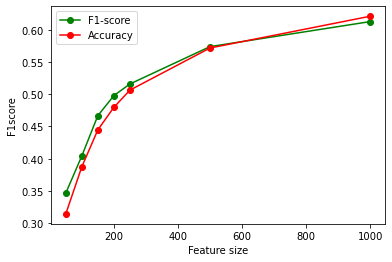

In [86]:
plt.xlabel('Feature size')
plt.ylabel('F1score')
plt.plot(max_features_size, f1_scores, marker='o', label='F1-score', color='green')
plt.plot(max_features_size, accuracies, marker='o', label='Accuracy', color='red')
plt.legend(loc=0)

In [84]:
metrics.classification_report(test_data.target, preds, target_names=test_data.target_names)

'                          precision    recall  f1-score   support\n\n             alt.atheism       0.57      0.33      0.42       319\n           comp.graphics       0.59      0.68      0.63       389\n comp.os.ms-windows.misc       0.56      0.61      0.59       394\ncomp.sys.ibm.pc.hardware       0.59      0.55      0.57       392\n   comp.sys.mac.hardware       0.71      0.62      0.66       385\n          comp.windows.x       0.74      0.67      0.70       395\n            misc.forsale       0.66      0.66      0.66       390\n               rec.autos       0.76      0.64      0.69       396\n         rec.motorcycles       0.83      0.64      0.72       398\n      rec.sport.baseball       0.88      0.75      0.81       397\n        rec.sport.hockey       0.33      0.93      0.49       399\n               sci.crypt       0.77      0.70      0.73       396\n         sci.electronics       0.50      0.39      0.44       393\n                 sci.med       0.87      0.62      0.72    

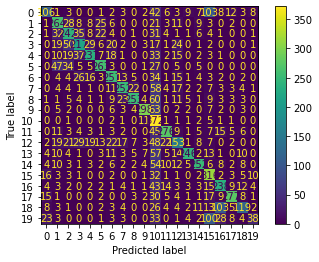

In [85]:
cm = metrics.confusion_matrix(test_data.target, preds, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()